In [2]:
import sys
from utils.mask2yolo import yolo2mask
import cv2
import os
from os.path import basename,join
import numpy as np
from utils.evaluate_LSC import evaluate_without_h5_nosubfolder
import matplotlib.pyplot as plt
from ultralytics import YOLO
from PIL import Image

In [2]:
model = YOLO('./weights/cvppp_yolo8l_ghost.pt')

In [14]:
results = model('./group3.png',save=True,show_labels=False,show_conf=False,boxes=False,retina_masks=True)

WARNING 'boxes' is deprecated and will be removed in in the future. Use 'show_boxes' instead.

image 1/1 C:\VsCodeProjects\ML\PlantsCV\group3.png: 512x512 37 leafs, 463.8ms
Speed: 2.1ms preprocess, 463.8ms inference, 157.7ms postprocess per image at shape (1, 3, 512, 512)
Results saved to runs\segment\predict23


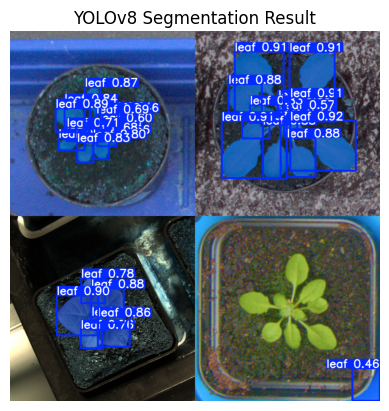

In [15]:
# Get the first result
result = results[0]

# If you want to show it manually:
img = result.plot()  # Returns a numpy array with the rendered image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

plt.imshow(img)
plt.axis('off')
plt.title("YOLOv8 Segmentation Result")
plt.show()

In [3]:
def _special_add(np1,np2,no_overlap=True):
    #cumu=0
    if no_overlap:
        np1m=np1.astype(bool)
        np2m=np2.astype(bool)
        overlap=np1m&np2m
        #cumu+=sum(overlap.flatten())
        np2[overlap]=0
        np3=np1+np2
    else:
        np3=np1+np2
    #print(cumu)
    return np3.astype(np.uint8)

In [4]:
def predict_mask(model_path, source, dest):
    if not os.path.exists(dest):
        os.makedirs(dest)
    model = YOLO(model_path)

    results = model(source=source, save=True, show_labels=False, show_conf=False, boxes=False, retina_masks=True)
    
    for result in results:
        image_name = basename(result.path)  
        mask_name = image_name.replace("_rgb.png", '_label.png')  
        pred_image_path = join(dest, mask_name)
        print(f"Saving mask to: {pred_image_path}")
        
        w, h = result.orig_img.shape[1], result.orig_img.shape[0]
        mask_overlap = np.zeros((h, w), dtype=np.uint8) 

        if result.masks is not None and len(result.masks) > 0:
            masks_data = result.masks.data
            i = 1
            for mask in masks_data:
                mask = mask.cpu().numpy()
                mask = cv2.resize(mask, (w, h))
                mask = (mask * i).astype(np.uint8)
                mask_overlap = _special_add(mask_overlap, mask)
                i += 1
            
            cv2.imwrite(pred_image_path, mask_overlap)

In [9]:
predict_mask('./weights/cvppp_yolo8l_ghost.pt', './img_top_hq_000.jpg', './output_masks')

WARNING 'boxes' is deprecated and will be removed in in the future. Use 'show_boxes' instead.

image 1/1 C:\VsCodeProjects\ML\PlantsCV\img_top_hq_000.jpg: 384x512 1 leaf, 38.6ms
Speed: 3.3ms preprocess, 38.6ms inference, 108.0ms postprocess per image at shape (1, 3, 384, 512)
Results saved to runs\segment\predict24
Saving mask to: ./output_masks\img_top_hq_000.jpg


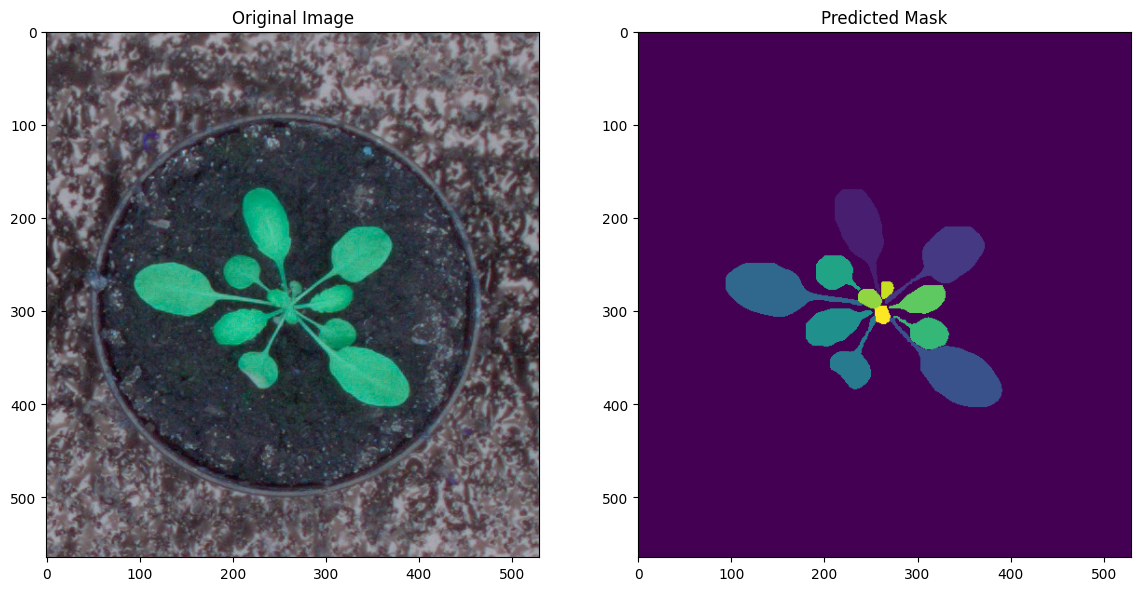

In [8]:
plant_img = Image.open('./images/plant029_rgb.png')
plant_mask = Image.open('./output_masks/plant029_label.png')  # note the filename fix

fig, ax = plt.subplots(1, 2, figsize=(14, 10))
ax[0].imshow(plant_img)
ax[0].set_title('Original Image')

ax[1].imshow(plant_mask, cmap='viridis')  # use gray colormap for masks
ax[1].set_title('Predicted Mask')

plt.show()

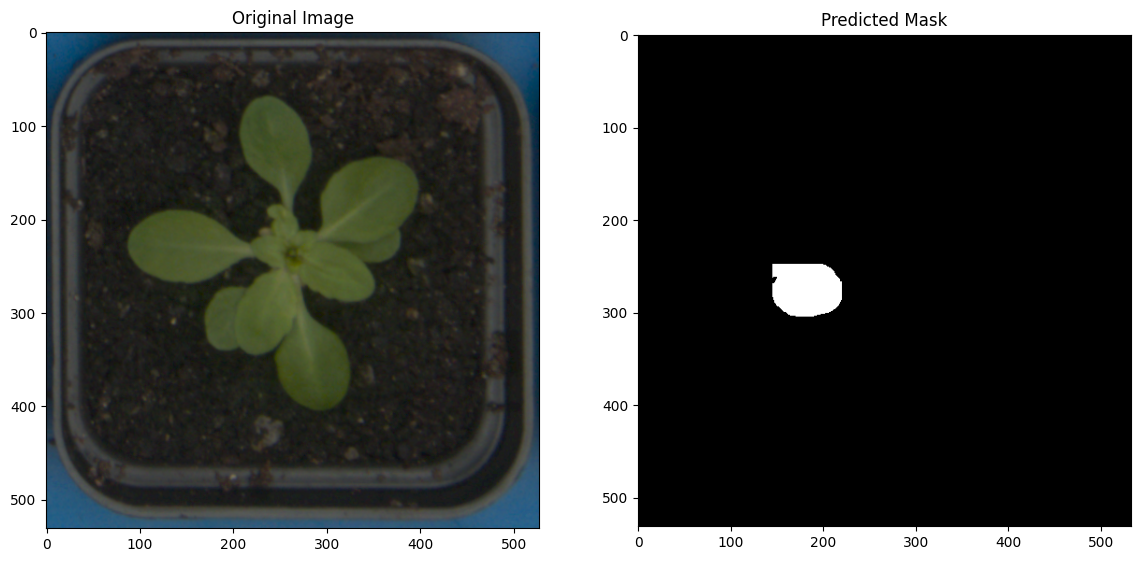

In [73]:
plant_img = Image.open('./plant033_rgb.png')
plant_mask = Image.open('./output_masks/plant_example.png')  # note the filename fix

fig, ax = plt.subplots(1, 2, figsize=(14, 10))
ax[0].imshow(plant_img)
ax[0].set_title('Original Image')

ax[1].imshow(plant_mask, cmap='gray')  # use gray colormap for masks
ax[1].set_title('Predicted Mask')

plt.show()

In [44]:
img = cv2.imread('./plant_example_rgb.png')

plant_img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

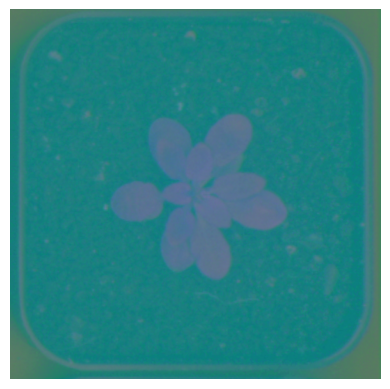

In [46]:
plt.imshow(plant_img_lab)
plt.axis('off')  # optional: hides the axes
plt.show()

In [47]:
a_channel = plant_img_lab[:, :, 1]

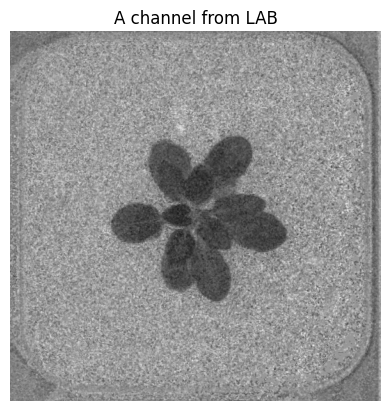

In [48]:
plt.imshow(a_channel, cmap='gray')
plt.title('A channel from LAB')
plt.axis('off')
plt.show()

In [49]:
img2 = cv2.imread('./plant029_rgb.png')

plant_img_lab2 = cv2.cvtColor(img2, cv2.COLOR_BGR2LAB)

In [50]:
a_channel2 = plant_img_lab2[:, :, 1]

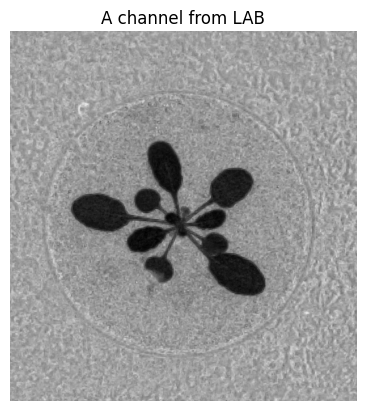

In [51]:
plt.imshow(a_channel2, cmap='gray')
plt.title('A channel from LAB')
plt.axis('off')
plt.show()

In [4]:
import h5py
import numpy as np


with h5py.File("cvppp_a1_90_r50_guide_cocopre.h5", "r") as f:
    for block_name in ['A1', 'A2', 'A3', 'A4', 'A5']:
        print(block_name)


A1
A2
A3
A4
A5
